# <font color = lightcoral>Step 1: Review Raw Data

## <font color = grey> Admin

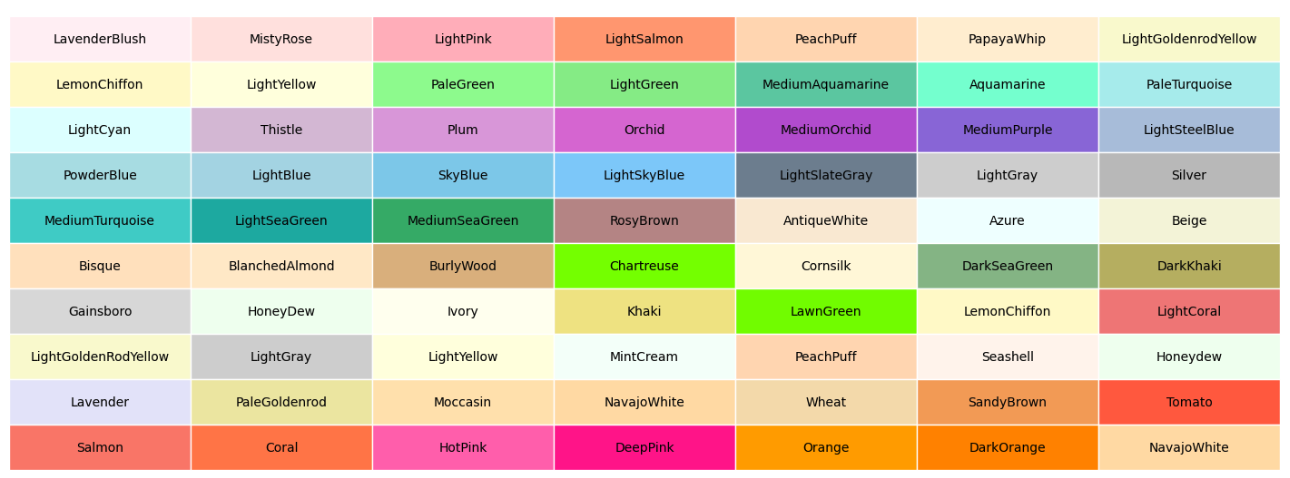

In [2]:
import pandas as pd
import os
import gzip
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /root


___
# <font color = darkkhaki> Review Raw Data

### <font color = grey> Raw Data

In [4]:
# Define the file path
file_path = os.path.join(base_dir, '11.Data/01.BGL/01.Raw_CFDR/bgl2.gz')

# Load and read the first 10 lines of the data
with gzip.open(file_path, 'rt') as f:
    lines = [next(f).strip() for _ in range(10)]

# Print the first 10 lines to understand the structure
for i, line in enumerate(lines, start=1):
    print(f"Line {i}: {line}")

Line 1: - 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
Line 2: - 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.527847 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
Line 3: - 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.675872 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
Line 4: - 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.823719 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
Line 5: - 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.982731 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
Line 6: - 1117838571 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.51.131467 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
Line 7: - 1117838571 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-1

### <font color = grey> Dataframe with AlertStatus

In [5]:
# Define the file path
file_path = os.path.join(base_dir, '11.Data/01.BGL/01.Raw_CFDR/bgl2.gz')

# Load and read the first 10 lines of the data
with gzip.open(file_path, 'rt') as f:
    lines = [next(f).strip() for _ in range(10)]

# Split the lines into columns based on the structure of the data
data = [line.split(' ', maxsplit=9) for line in lines]

# Add a new column for the alert status
alert_status = ['Alert' if parts[0] != '-' else 'Normal' for parts in data]

# Remove the first element (alert status) from each row in the data
data = [parts[1:] for parts in data]

# Define column names based on the observed structure
columns = ['ID', 'Date', 'Seq_ID_1', 'Timestamp', 'Seq_ID_2', 'Category', 'Component', 'Message_Type', 'Message_Body']

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)

# Add the alert status column
df.insert(0, 'AlertStatus', alert_status)

# Display the DataFrame
df

,AlertStatus,ID,Date,Seq_ID_1,Timestamp,Seq_ID_2,Category,Component,Message_Type,Message_Body
0,Normal,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
1,Normal,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
2,Normal,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
3,Normal,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
4,Normal,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
5,Normal,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.131467,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
6,Normal,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.293532,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
7,Normal,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.428563,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
8,Normal,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.601412,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
9,Normal,1117838571,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.51.749199,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected


___
## <font color = teal> Summary Stats

### <font color = grey> Foundational

In [6]:
# import os
# import gzip
# import pandas as pd
# import time

# # Define the file path
# file_path = os.path.join(base_dir, '11.Data/01.BGL/01.Raw_CFDR/bgl2.gz')

########## Note this columns list includes the new field 'AlertStatus' which is not in the oroginal DF ###########

columns = ['AlertStatus', 'ID', 'Date', 'Seq_ID_1', 'Timestamp', 'Seq_ID_2', 'Category', 'Component', 'Message_Type', 'Message_Body']

# Function to process each chunk and extract relevant statistics
def process_chunk(chunk):
    # Split the lines into columns
    data = [line.split(' ', maxsplit=9) for line in chunk]
    
    # Add a new column for the alert status
    alert_status = ['Alert' if parts[0] != '-' else 'Normal' for parts in data]
    
    # Remove the first element (alert status) from each row in the data
    data = [parts[1:] for parts in data]
    
    # Create a DataFrame
    df = pd.DataFrame(data, columns=columns[1:])
    df.insert(0, 'AlertStatus', alert_status)
    
    return df

# Initialize counters for total count, alert count, and normal count
total_count = 0
alert_count = 0
normal_count = 0

# Initialize sets for unique values
unique_seq_id_1 = set()
unique_seq_id_2 = set()
unique_categories = set()
unique_components = set()
unique_message_types = set()
unique_message_bodies = set()

# Start timing
start_time = time.time()

# Read the file in chunks
chunk_size = 100000  # Adjust the chunk size as needed
with gzip.open(file_path, 'rt') as f:
    while True:
        chunk = []
        for _ in range(chunk_size):
            try:
                chunk.append(next(f).strip())
            except StopIteration:
                break
        if not chunk:
            break
        
        # Process the chunk
        df = process_chunk(chunk)
        
        # Update counts
        total_count += len(df)
        alert_count += (df['AlertStatus'] == 'Alert').sum()
        normal_count += (df['AlertStatus'] == 'Normal').sum()
        
        # Update unique sets
        unique_seq_id_1.update(df['Seq_ID_1'])
        unique_seq_id_2.update(df['Seq_ID_2'])
        unique_categories.update(df['Category'])
        unique_components.update(df['Component'])
        unique_message_types.update(df['Message_Type'])
        unique_message_bodies.update(df['Message_Body'])

# End timing
end_time = time.time()
duration = end_time - start_time

# Calculate alert percentage
alert_percentage = (alert_count / total_count) * 100 if total_count > 0 else 0

# Create DataFrames to store the results
results_df_1 = pd.DataFrame({
    'Total Count': [total_count],
    'Alert Count': [alert_count],
    'Normal Count': [normal_count],
    'Alert Percentage': [alert_percentage]
})

results_df_2 = pd.DataFrame({
    'Distinct Seq_ID_1 Count': [len(unique_seq_id_1)]
})

results_df_3 = pd.DataFrame({
    'Distinct Seq_ID_2 Count': [len(unique_seq_id_2)]
})

results_df_4 = pd.DataFrame({
    'Distinct Category Count': [len(unique_categories)]
})

results_df_5 = pd.DataFrame({
    'Distinct Component Count': [len(unique_components)]
})

results_df_6 = pd.DataFrame({
    'Distinct Message_Type Count': [len(unique_message_types)]
})

results_df_7 = pd.DataFrame({
    'Distinct Message_Body Count': [len(unique_message_bodies)]
})

# Display the results DataFrames
print("Results for Total Count, Alert Count, Normal Count, Alert Percentage:")
display(results_df_1)

print("\nResults for Distinct Seq_ID_1 Count:")
display(results_df_2)

print("\nResults for Distinct Seq_ID_2 Count:")
display(results_df_3)

print("\nResults for Distinct Category Count:")
display(results_df_4)

print("\nResults for Distinct Component Count:")
display(results_df_5)

print("\nResults for Distinct Message_Type Count:")
display(results_df_6)

print("\nResults for Distinct Message_Body Count:")
display(results_df_7)

# Print the duration
print(f"\nTime taken to run the entire block: {duration:.2f} seconds")


Results for Total Count, Alert Count, Normal Count, Alert Percentage:


,Total Count,Alert Count,Normal Count,Alert Percentage
0,4747963,348698,4399265,7.34416



Results for Distinct Seq_ID_1 Count:


,Distinct Seq_ID_1 Count
0,69252



Results for Distinct Seq_ID_2 Count:


,Distinct Seq_ID_2 Count
0,69258



Results for Distinct Category Count:


,Distinct Category Count
0,7



Results for Distinct Component Count:


,Distinct Component Count
0,14



Results for Distinct Message_Type Count:


,Distinct Message_Type Count
0,10



Results for Distinct Message_Body Count:


,Distinct Message_Body Count
0,358357



Time taken to run the entire block: 38.43 seconds


___
## <font color = teal> Details

### <font color = grey> Categories

In [8]:
# Initialize a dictionary for category counts
category_counts = {}

# Start timing
start_time = time.time()

# Read the file in chunks
chunk_size = 100000
with gzip.open(file_path, 'rt') as f:
    while True:
        chunk = []
        for _ in range(chunk_size):
            try:
                chunk.append(next(f).strip())
            except StopIteration:
                break
        if not chunk:
            break
        df = process_chunk(chunk)
        for category in df['Category']:
            
            if category in category_counts:
                category_counts[category] += 1
            else:
                category_counts[category] = 1

# Create a DataFrame for category counts
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])
category_counts_df = category_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)


# End timing
end_time = time.time()
duration = end_time - start_time

# Display the DataFrame
print("Category Counts:")
print(category_counts_df)
print(f"\nTime taken: {duration:.2f} seconds")

Category Counts:
      Category    Count
0          RAS  4643432
1         NULL   104215
2       KERNEL      306
3          for        4
4  interrupts,        4
5    (5438708)        1
6    (4211594)        1

Time taken: 43.26 seconds


### <font color = grey> Components

In [9]:
# Start timing
start_time = time.time()

# Initialize a dictionary for component counts
component_counts = {}

# Read the file in chunks
with gzip.open(file_path, 'rt') as f:
    while True:
        chunk = []
        for _ in range(chunk_size):
            try:
                chunk.append(next(f).strip())
            except StopIteration:
                break
        if not chunk:
            break
        df = process_chunk(chunk)
        for component in df['Component']:
            if component in component_counts:
                component_counts[component] += 1
            else:
                component_counts[component] = 1

# Create a DataFrame for component counts
component_counts_df = pd.DataFrame(list(component_counts.items()), columns=['Component', 'Count'])
component_counts_df = component_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# End timing
end_time = time.time()
duration = end_time - start_time

# Display the DataFrame
print("Component Counts:")
print(component_counts_df)
print(f"\nTime taken: {duration:.2f} seconds")

Component Counts:
    Component    Count
0      KERNEL  4324651
1         APP   228536
2   DISCOVERY    97172
3        MMCS    88930
4    HARDWARE     5148
5     MONITOR     1681
6    LINKCARD     1170
7       FATAL      306
8        CMCS      211
9   BGLMASTER      145
10          a        4
11          0        4
12   SERV_NET        3
13        iar        2

Time taken: 43.96 seconds


### <font color = grey> Message Type

In [10]:
# Start timing
start_time = time.time()

# Initialize a dictionary for message type counts
message_type_counts = {}

# Read the file in chunks
with gzip.open(file_path, 'rt') as f:
    while True:
        chunk = []
        for _ in range(chunk_size):
            try:
                chunk.append(next(f).strip())
            except StopIteration:
                break
        if not chunk:
            break
        df = process_chunk(chunk)
        for message_type in df['Message_Type']:
            if message_type in message_type_counts:
                message_type_counts[message_type] += 1
            else:
                message_type_counts[message_type] = 1

# Create a DataFrame for message type counts
message_type_counts_df = pd.DataFrame(list(message_type_counts.items()), columns=['Message_Type', 'Count'])
message_type_counts_df = message_type_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# End timing
end_time = time.time()
duration = end_time - start_time

# Display the DataFrame
print("Message_Type Counts:")
print(message_type_counts_df)
print(f"\nTime taken: {duration:.2f} seconds")

Message_Type Counts:
   Message_Type    Count
0          INFO  3735813
1         FATAL   855195
2         ERROR   112355
3       WARNING    23357
4        SEVERE    19213
5       FAILURE     1714
6          Kill      306
7        single        4
8  microseconds        4
9   0x00544eb8,        2

Time taken: 43.68 seconds


### <font color = grey> Messages Body

In [11]:
# Start timing
start_time = time.time()

# Function to get message counts
def get_message_counts(file_path, chunk_size=100000, top_n=10):
    
    # Initialize a dictionary for message counts
    message_counts = {}

    # Read the file in chunks
    with gzip.open(file_path, 'rt') as f:
        while True:
            chunk = []
            for _ in range(chunk_size):
                try:
                    chunk.append(next(f).strip())
                except StopIteration:
                    break
            if not chunk:
                break
            df = process_chunk(chunk)
            for message in df['Message_Body']:
                if message in message_counts:
                    message_counts[message] += 1
                else:
                    message_counts[message] = 1

    # Create a DataFrame for the message counts, ordered by count descending
    message_counts_df = pd.DataFrame(list(message_counts.items()), columns=['Message_Body', 'Count'])
    message_counts_df = message_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

    # Limit the number of displayed messages
    if top_n is not None:
        message_counts_df = message_counts_df.head(top_n)


    # Display the DataFrame and timing
    # print("Message Counts:")
    message_counts_df
    
    return message_counts_df

# Get message counts (you can adjust the top_n parameter to display more or fewer messages)
message_counts_df = get_message_counts(file_path, top_n=1000)
message_counts_df.style.set_properties(subset=['Message_Body'], **{'text-align': 'left'})
# message_counts_df

# End timing
end_time = time.time()
duration = end_time - start_time
print(f"\nTime taken: {duration:.2f} seconds")
# message_counts_df

# Display the DataFrame with left-justified text for the 'Message' column
styled_df = message_counts_df.style.set_properties(subset=['Message_Body'], **{'text-align': 'left'})
display(styled_df)


Time taken: 44.63 seconds


,Message_Body,Count
0,data TLB error interrupt,152734
1,0 microseconds spent in the rbs signal handler during 0 calls. 0 microseconds was the maximum time for a single instance of a correctable ddr.,135005
2,instruction cache parity error corrected,105924
3,"idoproxydb hit ASSERT condition: ASSERT expression=0 Source file=idotransportmgr.cpp Source line=1043 Function=int IdoTransportMgr::SendPacket(IdoUdpMgr*, BglCtlPavTrace*)",84168
4,1146800 double-hummer alignment exceptions,74091
5,8 floating point alignment exceptions,65558
6,data storage interrupt,63493
7,5 floating point alignment exceptions,53099
8,instruction address: 0x00004ed8,47104
9,None,34470
